<a href="https://colab.research.google.com/github/ThousandAI/pycs4001/blob/main/class10/tensorflow_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.8.2


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

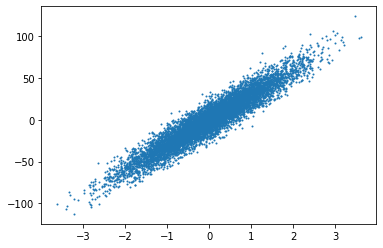

In [ ]:
X, Y = datasets.make_regression(n_samples=8000, n_features=1, noise=10, random_state=10)
Y = Y.reshape(-1,1)
scaler = StandardScaler()
sc_x = scaler.fit_transform(X)
sc_y = scaler.fit_transform(Y)
train_x, test_x, train_y, test_y  = train_test_split(sc_x, sc_y, test_size=0.2, random_state=10)
plt.scatter(X[:, 0], Y, s=1)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential([
  keras.layers.Dense(2,activation="relu",input_shape=(1,)),
  keras.layers.Dense(3,activation="relu"),
  keras.layers.Dense(1)      
])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
mse = keras.losses.MeanSquaredError()
evaluation = keras.metrics.MeanSquaredError()
optim = keras.optimizers.Adam()

In [ ]:
model.compile(loss=mse, optimizer=optim, metrics= evaluation)

In [ ]:
batch_size = 256
epochs = 500
model.fit(train_x, train_y, batch_size=batch_size, shuffle=True ,epochs=epochs)

Epoch 1/500
25/25 [==============================] - 2s 4ms/step - loss: 0.5669 - mean_squared_error: 0.5669
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4185 - mean_squared_error: 0.4185
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3040 - mean_squared_error: 0.3040
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2237 - mean_squared_error: 0.2237
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1705 - mean_squared_error: 0.1705
Epoch 6/500
25/25 [==============================] - 0s 6ms/step - loss: 0.1401 - mean_squared_error: 0.1401
Epoch 7/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1243 - mean_squared_error: 0.1243
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1172 - mean_squared_error: 0.1172
Epoch 9/500
25/25 [==============================] - 0s 5ms/step - loss: 0.1141 - mean_squared_error: 0.1141
Epoch 10/500
25/25 

In [ ]:
model.evaluate(test_x, test_y, batch_size = batch_size)

7/7 [==============================] - 0s 3ms/step - loss: 0.1058 - mean_squared_error: 0.1058


[0.10580646246671677, 0.10580646246671677]

In [ ]:
y_pred = model.predict(X)
Y_inv_pred = scaler.inverse_transform(y_pred)

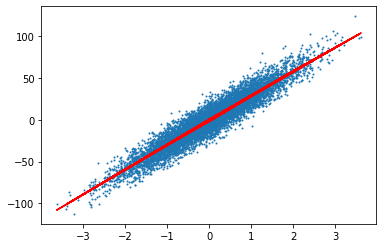

In [ ]:
plt.scatter(X[:, 0], Y, s = 1)
plt.plot(X, Y_inv_pred, color = 'red')
plt.show()